# Automated Analysis for Multiple Time Series 

- Author: Israel Oliveira [\[e-mail\]](mailto:'Israel%20Oliveira%20'<prof.israel@gmail.com>)

In [1]:
%load_ext watermark

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.grid'] = True
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
from tqdm import tqdm

from glob import glob

# import matplotlib.pyplot as plt
# %matplotlib inline
# from IPython.core.pylabtools import figsize
# figsize(12, 8)

# import seaborn as sns
# sns.set_theme()

# pd.set_option("max_columns", None)
# pd.set_option("max_rows", None)
# pd.set_option('display.max_colwidth', None)

# from IPython.display import Markdown, display
# def md(arg):
#     display(Markdown(arg))

# from pandas_profiling import ProfileReport
# #report = ProfileReport(#DataFrame here#, minimal=True)
# #report.to

# import pyarrow.parquet as pq
# #df = pq.ParquetDataset(path_to_folder_with_parquets, filesystem=None).read_pandas().to_pandas()

# import json
# def open_file_json(path,mode='r',var=None):
#     if mode == 'w':
#         with open(path,'w') as f:
#             json.dump(var, f)
#     if mode == 'r':
#         with open(path,'r') as f:
#             return json.load(f)

# import functools
# import operator
# def flat(a):
#     return functools.reduce(operator.iconcat, a, [])

# import json
# from glob import glob
# from typing import NewType


# DictsPathType = NewType("DictsPath", str)


# def open_file_json(path):
#     with open(path, "r") as f:
#         return json.load(f)

# class LoadDicts:
#     def __init__(self, dict_path: DictsPathType = "./data"):
#         Dicts_glob = glob(f"{dict_path}/*.json")
#         self.List = []
#         self.Dict = {}
#         for path_json in Dicts_glob:
#             name = path_json.split("/")[-1].replace(".json", "")
#             self.List.append(name)
#             self.Dict[name] = open_file_json(path_json)
#             setattr(self, name, self.Dict[name])


In [5]:
# Run this cell before close.
%watermark -d --iversion -b -r -g -m -v
!cat /proc/cpuinfo |grep 'model name'|head -n 1 |sed -e 's/model\ name/CPU/'
!free -h |cut -d'i' -f1  |grep -v total

Python implementation: CPython
Python version       : 3.9.6
IPython version      : 7.25.0

Compiler    : GCC 8.3.0
OS          : Linux
Release     : 5.11.0-7620-generic
Machine     : x86_64
Processor   : 
CPU cores   : 4
Architecture: 64bit

Git hash: b02195e21807b6159c1bffe67bd43a28e4cac3ea

Git repo: https://github.com/ysraell/forecasting.git

Git branch: main

pandas    : 1.3.1
matplotlib: 3.4.2
numpy     : 1.19.5

CPU	: Intel(R) Core(TM) i7-7500U CPU @ 2.70GHz
Mem:           15G
Swap:         4.0G


Dataset: Cryptocurrency Historical Prices. Prices of top cryptocurrencies including BTC, ETH, ADA, DOT and BNB.
Link: https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv

**Why bitcoin? It's only to stress the models. Please, do not use this to buy or sell your coins!!! I do not guarantee any investment strategy using this notebook.**

In [40]:
coins_dataset_path = '/work/data/coins'
df = pd.concat([pd.read_csv(csv, parse_dates=True) for csv in glob(f'{coins_dataset_path}/*csv')], ignore_index=True)

In [41]:
df.Date.head()

0    2017-06-14 23:59:59
1    2017-06-15 23:59:59
2    2017-06-16 23:59:59
3    2017-06-17 23:59:59
4    2017-06-18 23:59:59
Name: Date, dtype: object

In [42]:
df['Date'] = pd.to_datetime(df.Date)

In [43]:
df.Date.head()

0   2017-06-14 23:59:59
1   2017-06-15 23:59:59
2   2017-06-16 23:59:59
3   2017-06-17 23:59:59
4   2017-06-18 23:59:59
Name: Date, dtype: datetime64[ns]

In [44]:
Coins = df.Symbol.unique().tolist()

In [85]:
# vide import matplotlib.colors as mcolors; mcolors.TABLEAU_COLORS
col2color = {
    'High':'red',
    'Low':'gray', 
    'Open':'orange',
    'Close':'blue', 
    'Volume':'green',
    'Marketcap':'olive'
}
linestyle = {
    'High':':',
    'Low':':', 
    'Open':'--',
    'Close':'-', 
    'Volume':'-',
    'Marketcap':'-'
}
price_cols = ['High', 'Low', 'Open', 'Close']
other_cols = ['Volume', 'Marketcap']
cols2decomposed = ['Close']
modes2decomposed = ['additive', 'multiplicative']

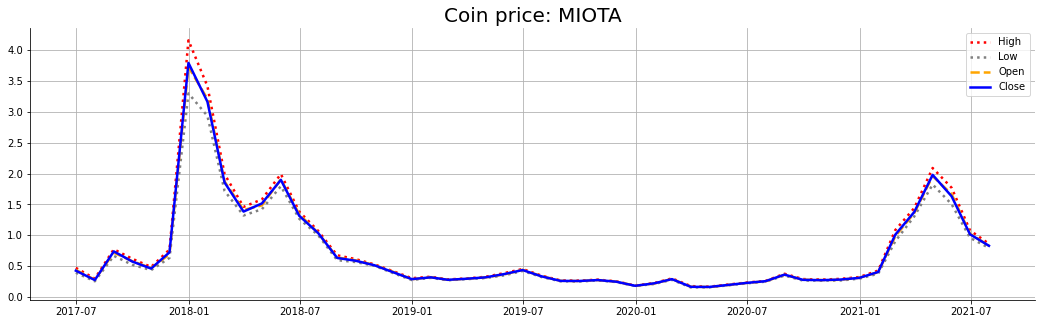

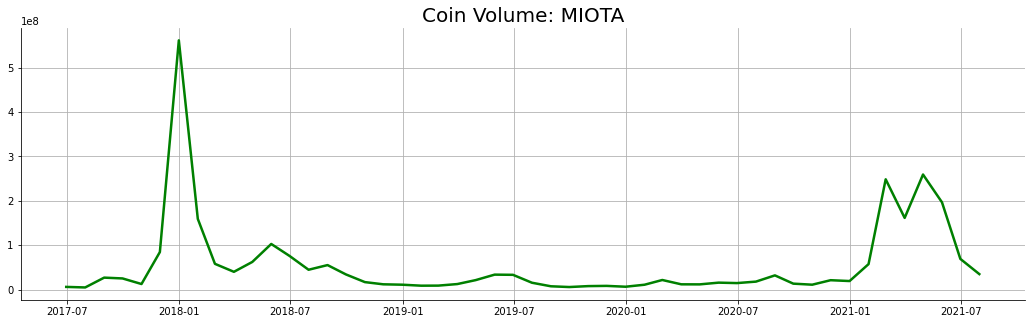

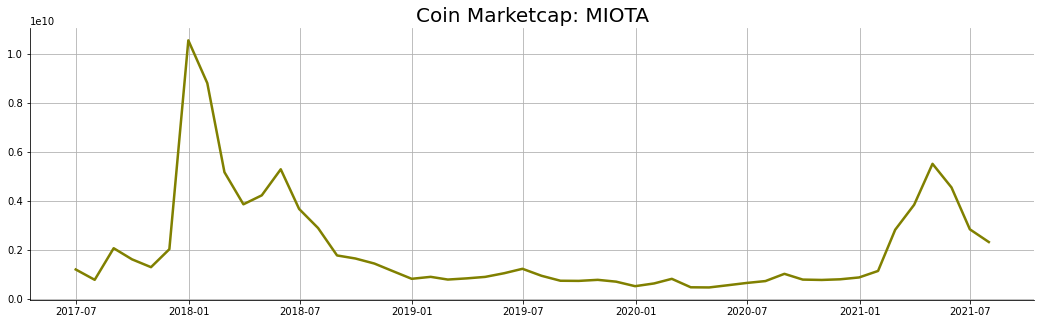

<Figure size 864x576 with 0 Axes>

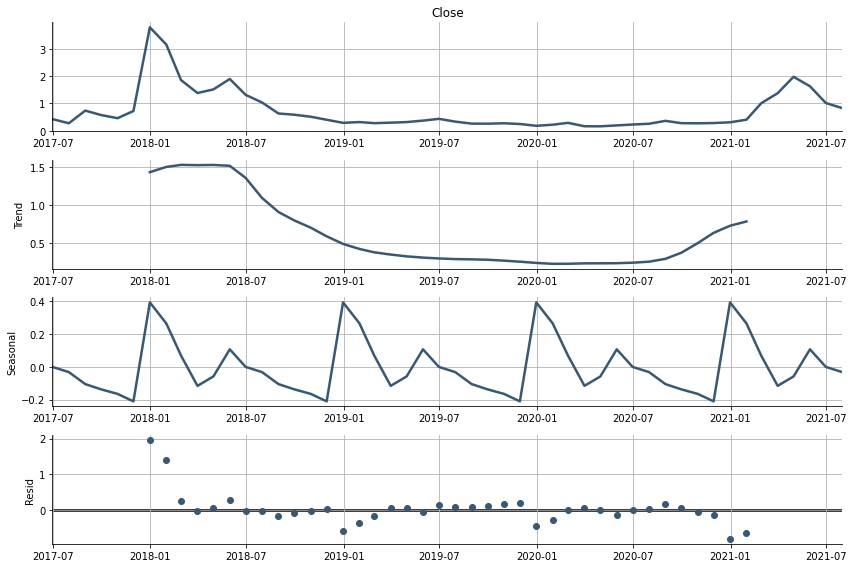

<Figure size 864x576 with 0 Axes>

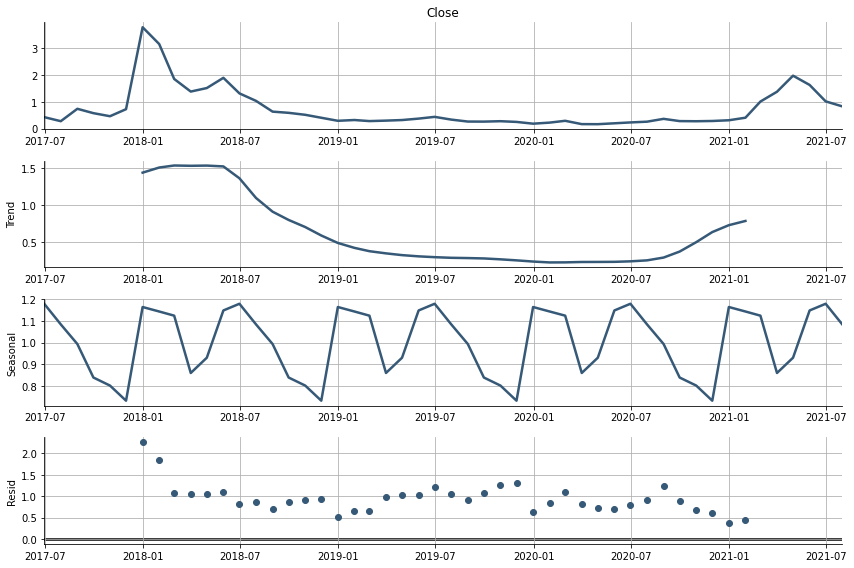

In [89]:
for coin in Coins:
    df_coin = df.query(f'Symbol == "{coin}"')[df.columns[3:]].set_index('Date').resample(rule='M').mean()
    
    rcParams['figure.figsize'] = 18, 5
    plt.figure()
    plt.title(f'Coin price: {coin}', size=20)
    for col in price_cols:
        plt.plot(df_coin[col], label=col, color=col2color[col], linestyle=linestyle[col])
    plt.legend()

    for col in other_cols:
        plt.figure()
        plt.title(f'Coin {col}: {coin}', size=20)
        plt.plot(df_coin[col], label=col, color=col2color[col], linestyle=linestyle[col])

    rcParams['figure.figsize'] = 12, 8
    for col in cols2decomposed:
        for model in modes2decomposed:
            plt.figure()
            decomposed = seasonal_decompose(df_coin[col], model=model)
            decomposed.plot();
    break